Exercises I

Run python -m pip install mysqlclient pymysql from your terminal to install pymysql and the mysqlclient.

Create a notebook or python script named advanced_dataframes to do your work in for these exercises.

In [1]:
import pandas as pd
import numpy as np
from pydataset import data


In [2]:
from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

1. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [3]:
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

2. Use your function to obtain a connection to the employees database.

In [4]:
url = get_db_url('employees')

In [5]:
sql_query = 'SELECT * FROM employees'

In [6]:
def get_employees_data(db):
    return pd.read_sql(sql_query, get_db_url(db))

In [7]:
get_employees_data('employees')

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


3. Once you have successfully run a query:

a. Intentionally make a typo in the database url. What kind of error message do you see?

b. Intentionally make an error in your SQL query. What does the error message look like?

4. Read the employees and titles tables into two separate DataFrames.

In [8]:
# create the employees DataFrame
employees_df = pd.read_sql('SELECT * FROM employees', url)



In [9]:
# create the titles DataDrame
titles_df = pd.read_sql('SELECT * FROM titles', url)

5. How many rows and columns do you have in each DataFrame? Is that what you expected?

In [10]:
# shape of employees_df
employees_df.shape

(300024, 6)

In [11]:
# shape of titles_df
titles_df.shape

(443308, 4)

6. Display the summary statistics for each DataFrame.

In [12]:
# what does employees_df look like / contain?
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [13]:
# how about titles?
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


7. How many unique titles are in the titles DataFrame?

In [14]:
# let's find the title column in the titles_df
titles_df['title'].head

<bound method NDFrame.head of 0         Senior Engineer
1                   Staff
2         Senior Engineer
3                Engineer
4         Senior Engineer
               ...       
443303           Engineer
443304    Senior Engineer
443305       Senior Staff
443306              Staff
443307           Engineer
Name: title, Length: 443308, dtype: object>

In [15]:
# now let's find the unique titles
titles_df['title'].unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [16]:
# how many is that?
titles_df['title'].nunique()

7

8. What is the oldest date in the to_date column?

In [17]:
# let's find the to_date column in the titles_df and sort it
titles_df['to_date'].sort_values().head()

# this will show me the data visually, but is not the best programmatical way to solve

16064     1985-03-01
406358    1985-03-11
346216    1985-03-20
35527     1985-03-23
277603    1985-04-17
Name: to_date, dtype: object

9. What is the most recent date in the to_date column?

In [18]:
# let's find the to_date column in the titles_df and sort it
titles_df['to_date'].sort_values(ascending=False).head()

# this will show me the data visually, but is not the best programmatical way to solve

443307    9999-01-01
191723    9999-01-01
191707    9999-01-01
191712    9999-01-01
191714    9999-01-01
Name: to_date, dtype: object

In [19]:
# what if I wanted the most recent, who is not a current employee?


Exercises II

1. Copy the users and roles DataFrames from the examples above.# 

In [20]:
# create the users
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users



,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [21]:
# create the roles DF
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


2. What is the result of using a right join on the DataFrames?

In [22]:
pd.concat([users, roles], axis=0, join='right')

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [23]:
users.merge(roles, how='right', on='id')

,id,name_x,role_id,name_y
0,1,bob,1.0,admin
1,2,joe,2.0,author
2,3,sally,3.0,reviewer
3,4,adam,3.0,commenter


3. What is the result of using an outer join on the DataFrames?

In [24]:
pd.concat([users, roles], axis=1, join='outer')

,id,name,role_id,id,name
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,4.0,commenter
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [25]:
(users.merge(roles, 
            left_on='role_id', 
            right_on='id', 
            how='outer')
    .drop(columns='role_id')
    .rename(columns={'id_x': 'id', 
                     'name_x': 'employee',
                     'id_y': 'role_id',
                     'name_y': 'role'}
            )
)

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


5. Load the mpg dataset from PyDataset.

In [26]:
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


6. Output and read the documentation for the mpg dataset.

In [27]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




7. How many rows and columns are in the dataset?

In [28]:
mpg_df.shape

(234, 11)

8. Check out your column names and perform any cleanup you may want on them.

In [29]:
# checking out the DF, and deciding what to change...
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [30]:
mpg_df.head(50)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [31]:
# changing column names...
mpg_df = mpg_df.rename(columns={'displ': 'displacement', 'cyl': 'cylinders', 'trans': 'transmission', 'drv': 'drive', 'cty': 'city', 'hwy': 'highway', 'fl': 'fuel_type','class': 'category'})

9. Display the summary statistics for the dataset.

In [32]:
mpg_df.describe()

,displacement,year,cylinders,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


10. How many different manufacturers are there?

In [33]:
mpg_df['manufacturer'].nunique()

15

11. How many different models are there?

In [34]:
mpg_df['model'].nunique()

38

12. Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [35]:
mpg_df['mileage_difference'] = mpg_df['highway'] - mpg_df['city']
mpg_df.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel_type,category,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


13. Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [36]:
mpg_df['average_mileage'] = (mpg_df['highway'] + mpg_df['city']) / 2
mpg_df.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel_type,category,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [37]:
mpg_url = f'mysql+pymysql://{user}:{password}@{host}/mpg'

In [38]:
bools_auto = mpg_df['transmission'].str.startswith('auto')
bools_auto

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: transmission, Length: 234, dtype: bool

In [39]:
mpg_df['is_automatic'] = bools_auto
mpg_df.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel_type,category,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True


15. Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

In [40]:
# let's find the mpg per manufacturer
mpg_by_manu = mpg_df.groupby('manufacturer').average_mileage.agg(['mean'])
mpg_by_manu

,mean
manufacturer,
audi,22.027778
chevrolet,18.447368
dodge,15.540541
ford,16.680000
honda,28.500000
hyundai,22.750000
jeep,15.562500
land rover,14.000000
lincoln,14.166667


In [41]:
mpg_by_manu.sort_values(by= 'mean', ascending=False)

,mean
manufacturer,
honda,28.500000
volkswagen,25.074074
hyundai,22.750000
subaru,22.428571
audi,22.027778
toyota,21.720588
pontiac,21.700000
nissan,21.346154
chevrolet,18.447368


In [42]:
mpg_by_manu.nlargest(1, 'mean', keep='all')

,mean
manufacturer,
honda,28.5


16. Do automatic or manual cars have better miles per gallon?

In [43]:
mpg_trans = mpg_df.groupby('is_automatic').average_mileage.agg(['mean'])
mpg_trans

,mean
is_automatic,
False,22.227273
True,19.130573


Exercises III

1. Use your get_db_url function to help you explore the data from the chipotle database.

In [44]:
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [45]:
url = get_db_url('chipotle')

In [46]:
chipotle_df = pd.read_sql('SELECT * FROM orders', url)
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [47]:
# what does the df look like?
chipotle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


2. What is the total price for each order?

In [48]:
# creating a new price column where price is a float value
chipotle_df['float_price'] = chipotle_df['item_price'].str.replace('$','').astype(float)
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price,float_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75


In [49]:
order_total = chipotle_df.groupby('order_id').float_price.agg('sum')
order_total

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: float_price, Length: 1834, dtype: float64

In [61]:
# this works way better

order_total = chipotle_df.groupby('order_id').sum('float_price')
order_total

,id,quantity,float_price
order_id,,,
1,10,4,11.56
2,5,2,16.98
3,13,2,12.67
4,17,2,21.00
5,21,2,13.70
...,...,...,...
1830,9223,2,23.00
1831,13842,3,12.90
1832,9233,2,13.20


3. What are the most popular 3 items?

In [50]:
top_items = chipotle_df.groupby('item_name').quantity.agg(['sum']).sort_values(by=['sum'], ascending=False)
top_items

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [51]:
top_items.nlargest(3, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


4. Which item has produced the most revenue?

In [52]:
chipotle_df.groupby('item_name').float_price.agg(['sum']).nlargest(1, 'sum', keep='all')


,sum
item_name,
Chicken Bowl,7342.73


5. Using the titles DataFrame, visualize the number of employees with each title.

In [53]:
titles_df['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

<AxesSubplot:title={'center':'Title Number Breakdown'}, xlabel='Job Title', ylabel='Title Count'>

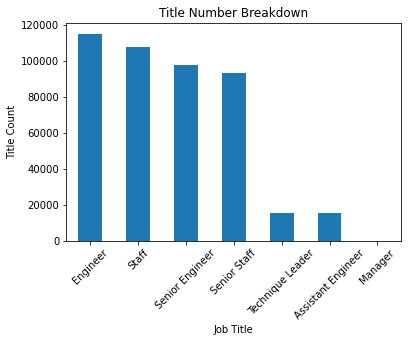

In [64]:
titles_df['title'].value_counts().plot.bar(rot=45, title = 'Title Number Breakdown', xlabel = 'Job Title', ylabel = 'Title Count')

6. Join the employees and titles DataFrames together.

In [54]:
emp_titles_df = employees_df.merge(titles_df, how='outer', on='emp_no')
emp_titles_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


7. Visualize how frequently employees change titles.

In [59]:
pd.crosstab(emp_titles_df.emp_no, emp_titles_df.title, margins=True)


title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
emp_no,,,,,,,,
10001,0,0,0,1,0,0,0,1
10002,0,0,0,0,0,1,0,1
10003,0,0,0,1,0,0,0,1
10004,0,1,0,1,0,0,0,2
10005,0,0,0,0,1,1,0,2


In [69]:
title_count = emp_titles_df.groupby('emp_no').title.count().value_counts()
title_count

1    159754
2    137256
3      3014
Name: title, dtype: int64

<AxesSubplot:>

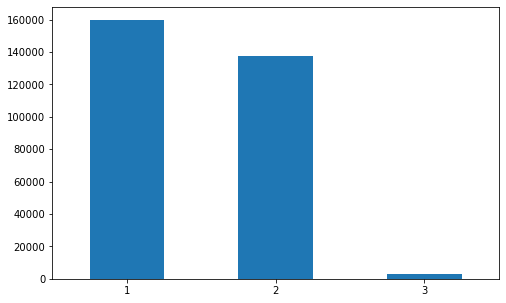

In [71]:
title_count.plot(kind = 'bar', rot = 0, figsize=(8,5))

In [60]:
pd.crosstab(emp_titles_df.emp_no, emp_titles_df.title, margins=True, normalize=True).head()


title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
emp_no,,,,,,,,
10001,0.0,0.000000,0.0,0.000002,0.000000,0.000000,0.0,0.000002
10002,0.0,0.000000,0.0,0.000000,0.000000,0.000002,0.0,0.000002
10003,0.0,0.000000,0.0,0.000002,0.000000,0.000000,0.0,0.000002
10004,0.0,0.000002,0.0,0.000002,0.000000,0.000000,0.0,0.000005
10005,0.0,0.000000,0.0,0.000000,0.000002,0.000002,0.0,0.000005


8. For each title, find the hire date of the employee that was hired most recently with that title.

In [72]:
emp_titles_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [73]:
# check Christopher's github

Demo Time Exercise 3:
4. Which item has produced the most revenue?

In [62]:
# create a new column that converts the item_price to a float
chipotle_df['float_price'] = chipotle_df['item_price'].str.replace('$','').astype(float)

# Check your work
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price,float_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98


In [63]:
# group by item name         
# add up the price within each item    
# keep the greatest(allows fo multiple if ties)
chipotle_df.groupby('item_name').float_price.agg(['sum']).nlargest(1, 'sum', keep='all')


,sum
item_name,
Chicken Bowl,7342.73
